In [38]:
import pandas as pd

In [39]:
L_Rides = pd.read_csv('CTA-L-Monthly-Ridership.csv',sep=',')
L_Rides.head()

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal
0,40900,Howard,01/01/2001,6233.9,3814.5,2408.6,164447
1,41190,Jarvis,01/01/2001,1489.1,1054.0,718.0,40567
2,40100,Morse,01/01/2001,4412.5,3064.5,2087.8,119772
3,41300,Loyola,01/01/2001,4664.5,3156.0,1952.8,125008
4,40760,Granville,01/01/2001,3109.8,2126.0,1453.8,84189


In [40]:
L_Rides.describe()

,station_id,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal
count,29460.000000,29460.000000,29460.000000,29460.000000,29460.000000
mean,40761.231840,3894.670808,2267.270292,1645.895648,100573.681772
std,445.675122,3330.672838,2292.542804,1787.455721,87257.791051
min,40010.000000,0.000000,0.000000,0.000000,0.000000
25%,40370.000000,1465.800000,815.800000,554.500000,37868.000000
50%,40750.000000,2952.750000,1473.500000,1018.450000,74881.000000
75%,41150.000000,5111.225000,2913.400000,2049.225000,132150.500000
max,41700.000000,24041.400000,19171.300000,15982.000000,670496.000000


In [41]:
Berwyn_Rides = L_Rides[L_Rides['stationame'] == 'Berwyn']
Berwyn_Rides.head()

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal
7,40340,Berwyn,01/01/2001,3329.6,2050.8,1445.6,88683
149,40340,Berwyn,02/01/2001,3420.1,2073.8,1564.3,82954
290,40340,Berwyn,03/01/2001,3402.8,2226.8,1579.3,92312
431,40340,Berwyn,04/01/2001,3343.7,2223.0,1560.4,86911
573,40340,Berwyn,05/01/2001,3388.9,2177.3,1690.4,91716


In [42]:
L_Rides.dtypes

station_id                    int64
stationame                   object
month_beginning              object
avg_weekday_rides           float64
avg_saturday_rides          float64
avg_sunday-holiday_rides    float64
monthtotal                    int64
dtype: object

In [43]:
L_Rides['date_time'] = pd.to_datetime(L_Rides['month_beginning'])
L_Rides.head()
L_Rides.dtypes

station_id                           int64
stationame                          object
month_beginning                     object
avg_weekday_rides                  float64
avg_saturday_rides                 float64
avg_sunday-holiday_rides           float64
monthtotal                           int64
date_time                   datetime64[ns]
dtype: object

In [44]:
Berwyn_Rides = L_Rides[(L_Rides['stationame'] == 'Berwyn') &
                       (L_Rides['date_time'] >= '01/01/2017') &
                       (L_Rides['date_time'] < '12/31/2017')]
Berwyn_Rides

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal,date_time
27300,40340,Berwyn,02/01/2017,3383.9,2498.5,1918.3,85345,2017-02-01
27444,40340,Berwyn,01/01/2017,3251.1,2558.0,1715.0,88796,2017-01-01
27588,40340,Berwyn,03/01/2017,3377.5,2349.5,1798.0,94273,2017-03-01
27732,40340,Berwyn,04/01/2017,3312.9,2489.4,1801.4,87712,2017-04-01
27876,40340,Berwyn,05/01/2017,3301.2,2388.0,1917.2,91764,2017-05-01
28020,40340,Berwyn,06/01/2017,3419.8,2915.3,2486.5,96843,2017-06-01
28164,40340,Berwyn,07/01/2017,3287.0,2663.4,1976.3,90915,2017-07-01
28308,40340,Berwyn,08/01/2017,3307.7,2661.3,2097.5,95112,2017-08-01
28453,40340,Berwyn,09/01/2017,3515.6,2634.4,2042.0,93693,2017-09-01
28598,40340,Berwyn,10/01/2017,3550.3,2773.8,2152.0,99962,2017-10-01


In [45]:
Berwyn_Rides['monthtotal'].sum()

1094141

In [46]:
BrynMawr_Rides = L_Rides[(L_Rides['stationame'] == 'Bryn Mawr') &
                       (L_Rides['date_time'] >= '01/01/2017') &
                       (L_Rides['date_time'] < '12/31/2017')]
BrynMawr_Rides['monthtotal'].sum()

1509613

In [49]:
%matplotlib inline

Total = Berwyn_Rides[['monthtotal','date_time']
Total

SyntaxError: invalid syntax (<ipython-input-49-7438ecf8ed32>, line 3)

In [50]:
Station_Group = L_Rides.groupby(['stationame'])
Station_Group

In [51]:
Station_Totals = pd.DataFrame(Station_Group['monthtotal'].sum())
Station_Totals.sort_values(ascending=False,by='monthtotal',inplace=True)
Station_Totals

,monthtotal
stationame,
Clark/Lake,87286240
Lake/State,86001098
Chicago/State,81619341
95th/Dan Ryan,67057314
Belmont-North Main,65913541
Fullerton,64654136
Grand/State,59926391
O'Hare Airport,57191519
Jackson/State,56114759


In [62]:
Station_Totals.head(5)

,monthtotal
stationame,
Clark/Lake,87286240
Lake/State,86001098
Chicago/State,81619341
95th/Dan Ryan,67057314
Belmont-North Main,65913541


In [61]:
Station_Totals.tail(5)

,monthtotal
stationame,
Kostner,2106177
Washington/Wabash,1712534
Oakton-Skokie,1548002
Cermak-McCormick Place,1428832
Homan,27


In [64]:
L_Rides[L_Rides['stationame']=='Homan']

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal,date_time
945,41580,Homan,07/01/2001,1.3,0.0,0.0,27,2001-07-01


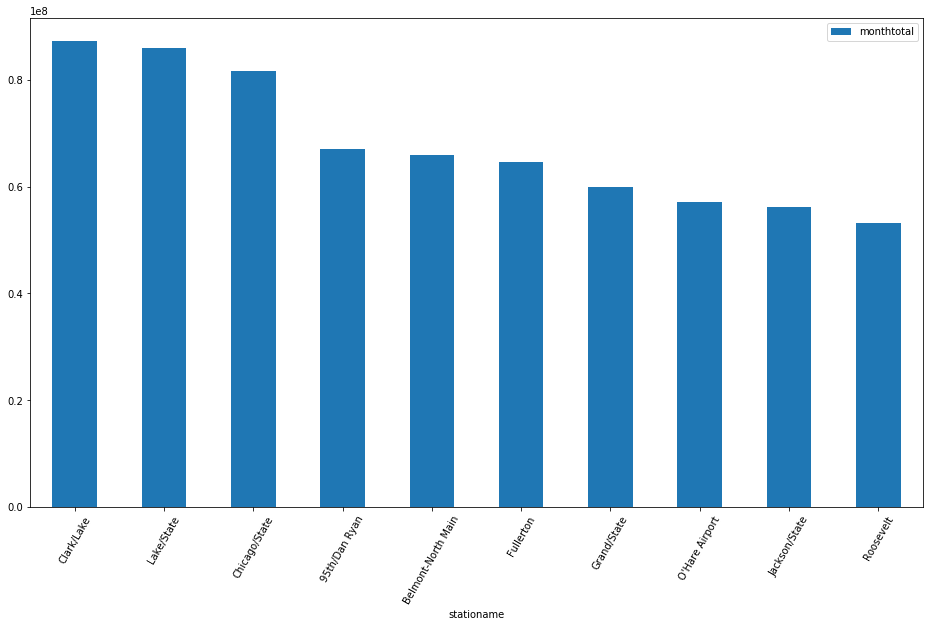

In [94]:
import matplotlib as plt

Station_Totals.head(10).plot.bar(rot=60)

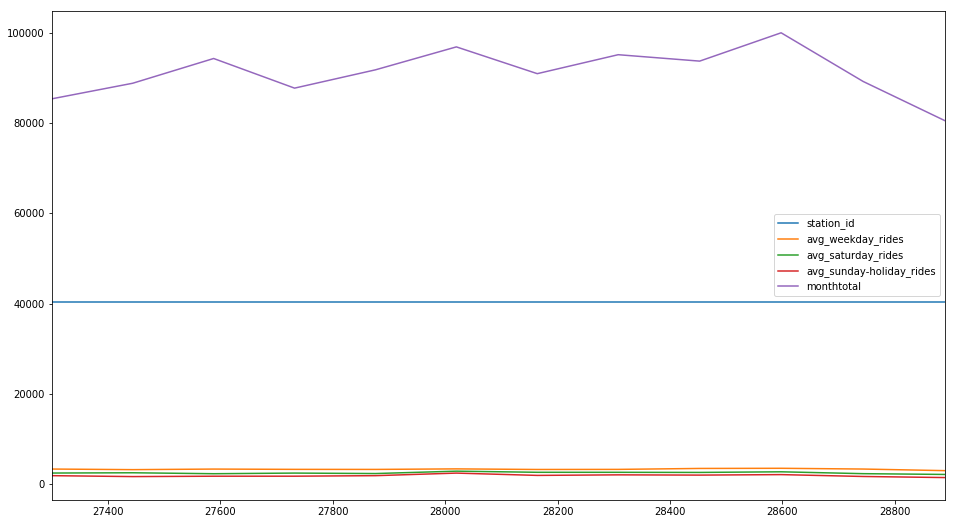

In [95]:
Berwyn_Rides.plot()

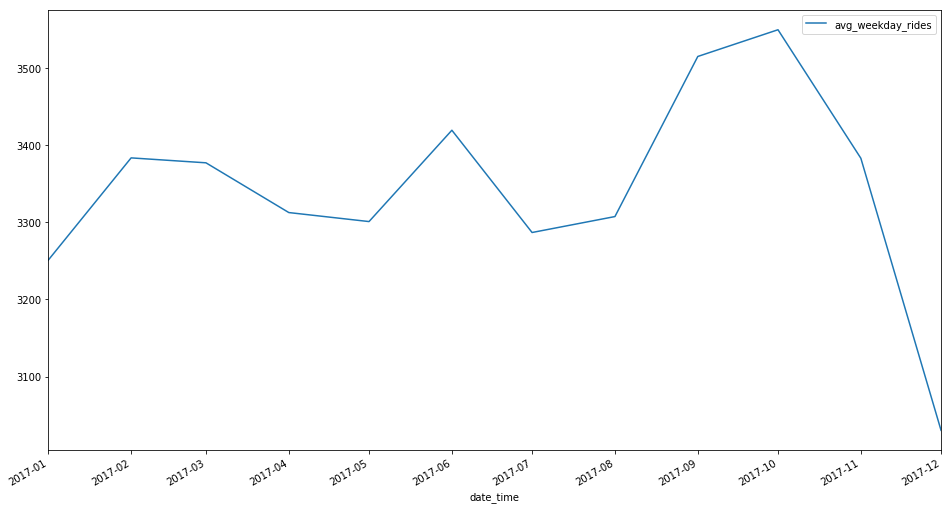

In [114]:
Berwyn_Rides.plot(x ='date_time', y='avg_weekday_rides')

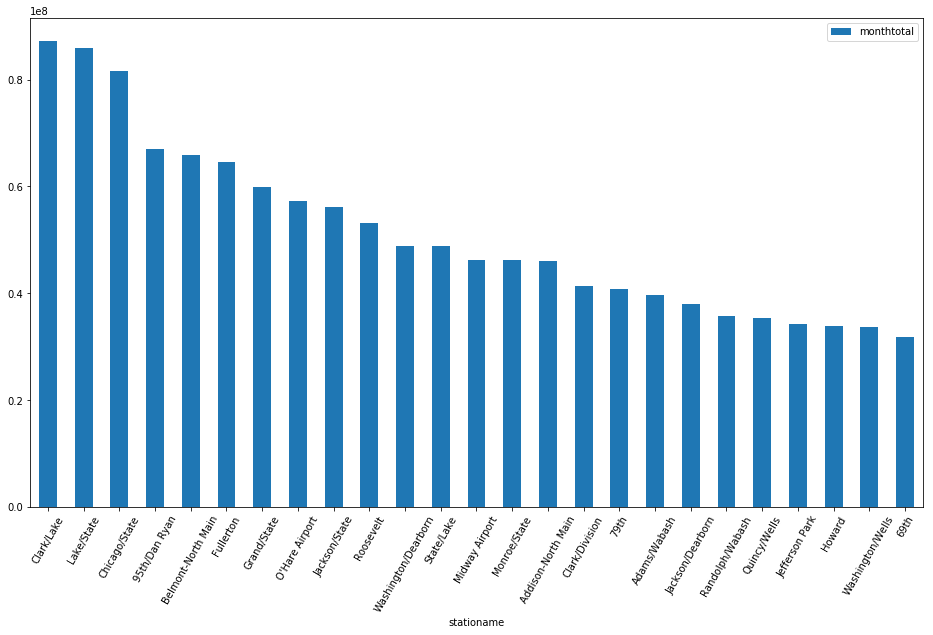

In [121]:
Station_Totals.head(25).plot(kind='bar',rot=60)

In [12]:
# Read in map 
L_Map = pd.read_csv('CTA-L-Stops-Map.csv',sep=',')
L_Map.head()

,STOP_ID,STOP_NAME,STATION_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,30161,18th (Loop-bound),18th,40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
1,30162,18th (54th/Cermak-bound),18th,40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
2,30022,35th/Archer (Loop-bound),35th/Archer,40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
3,30023,35th/Archer (Midway-bound),35th/Archer,40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
4,30213,35-Bronzeville-IIT (Harlem-bound),35th-Bronzeville-IIT,41120,True,False,False,True,False,False,False,False,False,False,"(41.831677, -87.625826)"


In [25]:
import math
from ast import literal_eval
def merc(Coords):
    Coordinates = literal_eval(Coords)
    lat = Coordinates[0]
    lon = Coordinates[1]
    
    r_major = 6378137.000
    x = r_major * math.radians(lon)
    scale = x/lon
    y = 180.0/math.pi * math.log(math.tan(math.pi/4.0 + lat * (math.pi/180.0)/2.0)) * scale
    return (x, y)

In [26]:
merc('(41.857908, -87.669147)')

(-9759284.802320646, 5139718.458609748)

In [28]:
L_Map['coords_x'] = L_Map['Location'].apply(lambda x: merc(x)[0])
L_Map['coords_y'] = L_Map['Location'].apply(lambda x: merc(x)[1])

In [35]:
L_Map[['Location','coords_x','coords_y']].head()

,Location,coords_x,coords_y
1,"(41.857908, -87.669147)",-9.759285e+06,5.139718e+06
3,"(41.829353, -87.680622)",-9.760562e+06,5.135452e+06
5,"(41.831677, -87.625826)",-9.754462e+06,5.135799e+06
7,"(41.816462, -87.619021)",-9.753705e+06,5.133526e+06
10,"(41.809209, -87.618826)",-9.753683e+06,5.132443e+06


In [31]:
L_Map

,STOP_ID,STOP_NAME,STATION_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location,coords_x,coords_y
0,30161,18th (Loop-bound),18th,40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)",-9.759285e+06,5.139718e+06
1,30162,18th (54th/Cermak-bound),18th,40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)",-9.759285e+06,5.139718e+06
2,30022,35th/Archer (Loop-bound),35th/Archer,40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)",-9.760562e+06,5.135452e+06
3,30023,35th/Archer (Midway-bound),35th/Archer,40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)",-9.760562e+06,5.135452e+06
4,30213,35-Bronzeville-IIT (Harlem-bound),35th-Bronzeville-IIT,41120,True,False,False,True,False,False,False,False,False,False,"(41.831677, -87.625826)",-9.754462e+06,5.135799e+06
5,30214,35-Bronzeville-IIT (63rd-bound),35th-Bronzeville-IIT,41120,True,False,False,True,False,False,False,False,False,False,"(41.831677, -87.625826)",-9.754462e+06,5.135799e+06
6,30245,43rd (Harlem-bound),43rd,41270,True,False,False,True,False,False,False,False,False,False,"(41.816462, -87.619021)",-9.753705e+06,5.133526e+06
7,30246,43rd (63rd-bound),43rd,41270,True,False,False,True,False,False,False,False,False,False,"(41.816462, -87.619021)",-9.753705e+06,5.133526e+06
8,30210,47th (63rd-bound),47th,41080,True,False,False,True,False,False,False,False,False,False,"(41.809209, -87.618826)",-9.753683e+06,5.132443e+06
9,30237,47th (Howard-bound),47th,41230,True,True,False,False,False,False,False,False,False,False,"(41.810318, -87.63094)",-9.755032e+06,5.132608e+06


In [34]:
L_Map.drop_duplicates(subset='MAP_ID', keep="last", inplace=True)
L_Map

,STOP_ID,STOP_NAME,STATION_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location,coords_x,coords_y
1,30162,18th (54th/Cermak-bound),18th,40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)",-9.759285e+06,5.139718e+06
3,30023,35th/Archer (Midway-bound),35th/Archer,40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)",-9.760562e+06,5.135452e+06
5,30214,35-Bronzeville-IIT (63rd-bound),35th-Bronzeville-IIT,41120,True,False,False,True,False,False,False,False,False,False,"(41.831677, -87.625826)",-9.754462e+06,5.135799e+06
7,30246,43rd (63rd-bound),43rd,41270,True,False,False,True,False,False,False,False,False,False,"(41.816462, -87.619021)",-9.753705e+06,5.133526e+06
10,30209,47th (Harlem-bound),47th,41080,True,False,False,True,False,False,False,False,False,False,"(41.809209, -87.618826)",-9.753683e+06,5.132443e+06
11,30238,47th (95th-bound),47th,41230,True,True,False,False,False,False,False,False,False,False,"(41.810318, -87.63094)",-9.755032e+06,5.132608e+06
13,30025,51st (63rd-bound),51st,40130,True,False,False,True,False,False,False,False,False,False,"(41.80209, -87.618487)",-9.753645e+06,5.131379e+06
15,30114,54th/Cermak (Terminal arrival),54th/Cermak,40580,True,False,False,False,False,False,False,False,True,False,"(41.85177331, -87.75669201)",-9.769030e+06,5.138802e+06
17,30178,63rd (95th-bound),63rd,40910,True,True,False,False,False,False,False,False,False,False,"(41.780536, -87.630952)",-9.755033e+06,5.128161e+06
19,30192,69th (95th-bound),69th,40990,True,True,False,False,False,False,False,False,False,False,"(41.768367, -87.625724)",-9.754451e+06,5.126345e+06


In [52]:
Station_Group = L_Rides.groupby(['station_id'])
Station_Totals = pd.DataFrame(Station_Group['monthtotal'].sum())
Station_Totals.sort_values(ascending=False,by='monthtotal',inplace=True)
Station_Totals

,monthtotal
station_id,
40380,87286240
41660,86001098
41450,81619341
40450,67057314
41320,65913541
41220,64654136
40330,59926391
40890,57191519
40560,56114759


In [53]:
Merged = pd.merge(L_Map, Station_Totals, left_on='MAP_ID', right_index=True)
Merged

,STOP_ID,STOP_NAME,STATION_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location,coords_x,coords_y,monthtotal
1,30162,18th (54th/Cermak-bound),18th,40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)",-9.759285e+06,5.139718e+06,7896620
3,30023,35th/Archer (Midway-bound),35th/Archer,40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)",-9.760562e+06,5.135452e+06,14138068
5,30214,35-Bronzeville-IIT (63rd-bound),35th-Bronzeville-IIT,41120,True,False,False,True,False,False,False,False,False,False,"(41.831677, -87.625826)",-9.754462e+06,5.135799e+06,11640635
7,30246,43rd (63rd-bound),43rd,41270,True,False,False,True,False,False,False,False,False,False,"(41.816462, -87.619021)",-9.753705e+06,5.133526e+06,5255895
10,30209,47th (Harlem-bound),47th,41080,True,False,False,True,False,False,False,False,False,False,"(41.809209, -87.618826)",-9.753683e+06,5.132443e+06,7044958
11,30238,47th (95th-bound),47th,41230,True,True,False,False,False,False,False,False,False,False,"(41.810318, -87.63094)",-9.755032e+06,5.132608e+06,16464305
13,30025,51st (63rd-bound),51st,40130,True,False,False,True,False,False,False,False,False,False,"(41.80209, -87.618487)",-9.753645e+06,5.131379e+06,5989070
15,30114,54th/Cermak (Terminal arrival),54th/Cermak,40580,True,False,False,False,False,False,False,False,True,False,"(41.85177331, -87.75669201)",-9.769030e+06,5.138802e+06,9721173
17,30178,63rd (95th-bound),63rd,40910,True,True,False,False,False,False,False,False,False,False,"(41.780536, -87.630952)",-9.755033e+06,5.128161e+06,18262168
19,30192,69th (95th-bound),69th,40990,True,True,False,False,False,False,False,False,False,False,"(41.768367, -87.625724)",-9.754451e+06,5.126345e+06,31758759


In [55]:
Merged[['coords_x','coords_y','monthtotal']].head()

,coords_x,coords_y,monthtotal
1,-9.759285e+06,5.139718e+06,7896620
3,-9.760562e+06,5.135452e+06,14138068
5,-9.754462e+06,5.135799e+06,11640635
7,-9.753705e+06,5.133526e+06,5255895
10,-9.753683e+06,5.132443e+06,7044958


In [199]:
Merged.drop_duplicates(subset='MAP_ID', keep="last",inplace=True)

In [63]:
Merged['circle_sizes'] = Merged['monthtotal'] / 2000000
Merged

,STOP_ID,STOP_NAME,STATION_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location,coords_x,coords_y,monthtotal,circle_sizes
1,30162,18th (54th/Cermak-bound),18th,40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)",-9.759285e+06,5.139718e+06,7896620,3.948310
3,30023,35th/Archer (Midway-bound),35th/Archer,40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)",-9.760562e+06,5.135452e+06,14138068,7.069034
5,30214,35-Bronzeville-IIT (63rd-bound),35th-Bronzeville-IIT,41120,True,False,False,True,False,False,False,False,False,False,"(41.831677, -87.625826)",-9.754462e+06,5.135799e+06,11640635,5.820317
7,30246,43rd (63rd-bound),43rd,41270,True,False,False,True,False,False,False,False,False,False,"(41.816462, -87.619021)",-9.753705e+06,5.133526e+06,5255895,2.627947
10,30209,47th (Harlem-bound),47th,41080,True,False,False,True,False,False,False,False,False,False,"(41.809209, -87.618826)",-9.753683e+06,5.132443e+06,7044958,3.522479
11,30238,47th (95th-bound),47th,41230,True,True,False,False,False,False,False,False,False,False,"(41.810318, -87.63094)",-9.755032e+06,5.132608e+06,16464305,8.232152
13,30025,51st (63rd-bound),51st,40130,True,False,False,True,False,False,False,False,False,False,"(41.80209, -87.618487)",-9.753645e+06,5.131379e+06,5989070,2.994535
15,30114,54th/Cermak (Terminal arrival),54th/Cermak,40580,True,False,False,False,False,False,False,False,True,False,"(41.85177331, -87.75669201)",-9.769030e+06,5.138802e+06,9721173,4.860587
17,30178,63rd (95th-bound),63rd,40910,True,True,False,False,False,False,False,False,False,False,"(41.780536, -87.630952)",-9.755033e+06,5.128161e+06,18262168,9.131084
19,30192,69th (95th-bound),69th,40990,True,True,False,False,False,False,False,False,False,False,"(41.768367, -87.625724)",-9.754451e+06,5.126345e+06,31758759,15.879380


In [5]:
# 1. Import Modules
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

# 2. Create Figure
p = figure(plot_width = 600, plot_height = 400, title = 'My First Plot')

# 3. Add Glyphs
x = [1, 2, 3, 4, 5]
y = [10, 20, 40, 80, 160]

p.circle(x, y, color = 'red', alpha = 0.5, size = 15)

# 4. Show the plot
output_notebook()
show(p)

Loading BokehJS ...

In [8]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.tile_providers import CARTODBPOSITRON

p = figure(x_range=(-9780000, -9745000), y_range=(5130000, 5160000),
           x_axis_type="mercator", y_axis_type="mercator")

p.add_tile(CARTODBPOSITRON)

output_notebook()
show(p)

Loading BokehJS ...

In [36]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.tile_providers import CARTODBPOSITRON

p = figure(x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(CARTODBPOSITRON)

p.circle(x = L_Map['coords_x'],
         y = L_Map['coords_y'])

output_notebook()
show(p)

Loading BokehJS ...

In [64]:
from bokeh.models import ColumnDataSource
from bokeh.models import HoverTool
source = ColumnDataSource(data=dict(x=list(Merged['coords_x']), 
                                    y=list(Merged['coords_y']),
                                    ridership=list(Merged['monthtotal']),
                                    sizes=list(Merged['circle_sizes']),
                                    stationname=list(Merged['STATION_NAME'])))

hover = HoverTool(tooltips=[
    ("station", "@stationname"),
    ("ridership","@ridership")
    
])

from bokeh.plotting import figure, show, output_notebook
from bokeh.tile_providers import CARTODBPOSITRON

# range bounds supplied in web mercator coordinates
p = figure(x_axis_type="mercator", y_axis_type="mercator",tools=[hover, 'wheel_zoom','save'],plot_width=700, plot_height=800)
p.add_tile(CARTODBPOSITRON)

p.circle(x='x',y='y', source=source,size='sizes',line_color="#FF0000", fill_color="#FF0000",fill_alpha=0.05)
    
output_notebook()

show(p)

Loading BokehJS ...

In [132]:
from bokeh.plotting import figure, show, output_notebook, output_file
from bokeh.tile_providers import CARTODBPOSITRON
from bokeh.models import ColumnDataSource, HoverTool

source = ColumnDataSource(data=dict(x=list(Merged['coords_x']), 
                                    y=list(Merged['coords_y']),
                                    ridership=list(Merged['monthtotal']),
                                    sizes=list(Merged['circle_sizes']),
                                    stationname=list(Merged['STATION_NAME'])))

hover = HoverTool(tooltips=[
    ("station", "@stationname"),
    ("ridership","@ridership")
    
])

# range bounds supplied in web mercator coordinates
p = figure(x_axis_type="mercator", y_axis_type="mercator",tools=[hover, 'wheel_zoom','pan','save'])
p.add_tile(CARTODBPOSITRON)

p.circle(x='x',
         y='y', 
         source=source,
         size='sizes',
         line_color="#FF0000", 
         fill_color="#FF0000",
         fill_alpha=0.05)
    
output_file('CTA_index.html')

show(p)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: sizes, x, y [renderer: GlyphRenderer(id='59dd7e7c-f009-42e5-8adf-c6101749454b', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: circle_sizes, x, y [renderer: GlyphRenderer(id='0b96bc3b-130f-4363-a378-114cee987c42', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: sizes, x, y [renderer: GlyphRenderer(id='a900735f-ba30-4295-9a13-4e1c317f3fa7', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: circle_sizes, x, y [renderer: GlyphRenderer(id='fdfeb0b9-c687-48fc-883d-65e2ae4d9de5', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: circle_sizes [renderer: GlyphRenderer(id='d0ceef88-9260-46b1-8a71-4c80e1040036', ...)]


In [133]:
from bokeh.plotting import figure, show, output_notebook, output_file
from bokeh.tile_providers import CARTODBPOSITRON
from bokeh.models import ColumnDataSource, HoverTool

source = ColumnDataSource(data=dict(x=list(Merged['coords_x']), 
                                    y=list(Merged['coords_y']),
                                    ridership=list(Merged['monthtotal']),
                                    sizes=list(Merged['circle_sizes']),
                                    stationname=list(Merged['STATION_NAME'])))

hover = HoverTool(tooltips=[
    ("station", "@stationname"),
    ("ridership","@ridership")
    
])

# range bounds supplied in web mercator coordinates
p = figure(sizing_mode='stretch_both',x_axis_type="mercator", y_axis_type="mercator",tools=[hover, 'wheel_zoom','save'])
p.add_tile(CARTODBPOSITRON)

p.circle(x='x',
         y='y', 
         source=source,
         size='sizes',
         line_color="#FF0000", 
         fill_color="#FF0000",
         fill_alpha=0.05)
    
output_file('Chicago_Ridership.html')

show(p)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: sizes, x, y [renderer: GlyphRenderer(id='59dd7e7c-f009-42e5-8adf-c6101749454b', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: circle_sizes, x, y [renderer: GlyphRenderer(id='0b96bc3b-130f-4363-a378-114cee987c42', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: sizes, x, y [renderer: GlyphRenderer(id='a900735f-ba30-4295-9a13-4e1c317f3fa7', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: circle_sizes, x, y [renderer: GlyphRenderer(id='fdfeb0b9-c687-48fc-883d-65e2ae4d9de5', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: circle_sizes [renderer: GlyphRenderer(id='d0ceef88-9260-46b1-8a71-4c80e1040036', ...)]


In [71]:
Date_Group = L_Rides.groupby(['date_time'])

In [102]:
Grouped_Dates = Date_Group.sum()
Grouped_Dates = Grouped_Dates[(Grouped_Dates.index >= '2010/1/1')]

In [103]:
Grouped_Dates.head()

,station_id,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal
date_time,,,,,
2010-01-01,5746690,512195.0,267274.4,188888.3,12713539
2010-02-01,5746690,534511.5,305364.2,220716.4,12794456
2010-03-01,5746690,540050.5,314101.3,219096.5,14553926
2010-04-01,5746690,562941.0,326933.8,224482.3,14590334
2010-05-01,5746690,557087.8,347571.4,250105.9,14380178


In [127]:
pd.to_numeric(Grouped_Dates.index)[0]

1262304000000000000

In [129]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import Span

a = figure(toolbar_location=None, tools="",plot_width=950, plot_height=500,x_axis_type='datetime',y_range=[0,710000])

a.vbar(x=Grouped_Dates.index,top=Grouped_Dates['avg_weekday_rides'],width=Grouped_Dates.index[1] - Grouped_Dates.index[0],bottom=0,fill_color="#FFC300",line_color="#FFC300",fill_alpha=0.5)
a.vbar(x=Grouped_Dates.index,top=Grouped_Dates['avg_saturday_rides'],width=Grouped_Dates.index[1] - Grouped_Dates.index[0], bottom=0, fill_color="#C70039",line_color="#C70039",fill_alpha=0.5)
a.vbar(x=Grouped_Dates.index,top=Grouped_Dates['avg_sunday-holiday_rides'],width=Grouped_Dates.index[1] - Grouped_Dates.index[0], bottom=0, fill_color="#900C3F",line_color="#900C3F",fill_alpha=0.5)

vline = Span(location=pd.to_numeric(Grouped_Dates.index)[0], dimension='height')
hline = Span(location=0, dimension='width', line_color='green', line_width=3)
p.renderers.extend([vline])

output_notebook()
show(a)

Loading BokehJS ...

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: sizes, x, y [renderer: GlyphRenderer(id='59dd7e7c-f009-42e5-8adf-c6101749454b', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: circle_sizes, x, y [renderer: GlyphRenderer(id='0b96bc3b-130f-4363-a378-114cee987c42', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: sizes, x, y [renderer: GlyphRenderer(id='a900735f-ba30-4295-9a13-4e1c317f3fa7', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: circle_sizes, x, y [renderer: GlyphRenderer(id='fdfeb0b9-c687-48fc-883d-65e2ae4d9de5', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: circle_sizes [renderer: GlyphRenderer(id='d0ceef88-9260-46b1-8a71-4c80e1040036', ...)]
